In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

DATA_DIR = "data/"
DATA_PROC_DIR = "data-processed/"
ATAC_SEQ_PATH = os.path.join(DATA_DIR, "ImmGenATAC18_AllOCRsInfo.csv")
atac = pd.read_csv(ATAC_SEQ_PATH, index_col=[0,1,2]).drop(columns=["mm10.60way.phastCons_scores", "_-log10_bestPvalue", "Included.in.systematic.analysis"]).select_dtypes(include=[np.number])
#RNA_SEQ_PATH = os.path.join(DATA_DIR, "mmc2.csv")
#PROC_PEAKS_PATH = os.path.join(DATA_PROC_DIR, "peaks_annotated.csv")

REGRESSION_PATH = os.path.join(DATA_PROC_DIR, "gene_regression.csv")

# Load regression results
# This file contains the results of the regression analysis performed in the previous notebook.
regdf = pd.read_csv(REGRESSION_PATH)

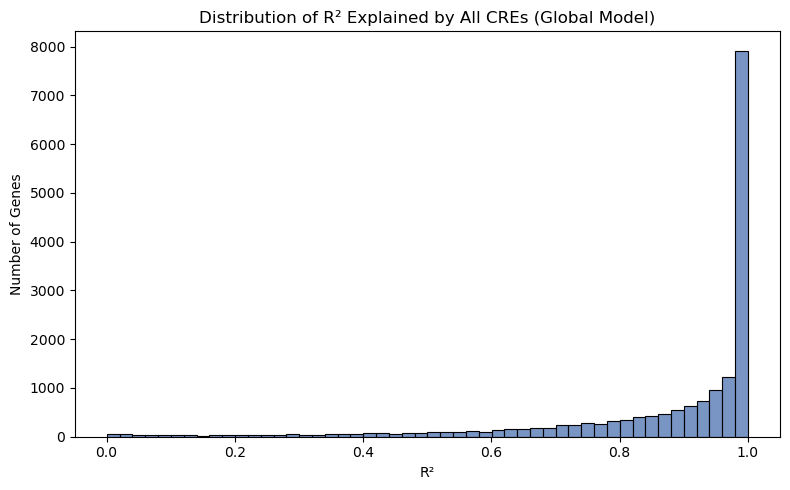

R² summary:
 count    17469.000000
mean         0.873958
std          0.198776
min          0.000491
25%          0.830172
50%          0.967230
75%          1.000000
max          1.000000
Name: R2_global, dtype: float64


In [101]:
# a) Variance explained per gene (global)
r2_global = regdf.groupby("gene")["R2_global"].first()

plt.figure(figsize=(8, 5))
sns.histplot(r2_global, bins=50, color="#4c72b0")
plt.title("Distribution of R² Explained by All CREs (Global Model)")
plt.xlabel("R²")
plt.ylabel("Number of Genes")
plt.tight_layout()
plt.show()

print("R² summary:\n", r2_global.describe())

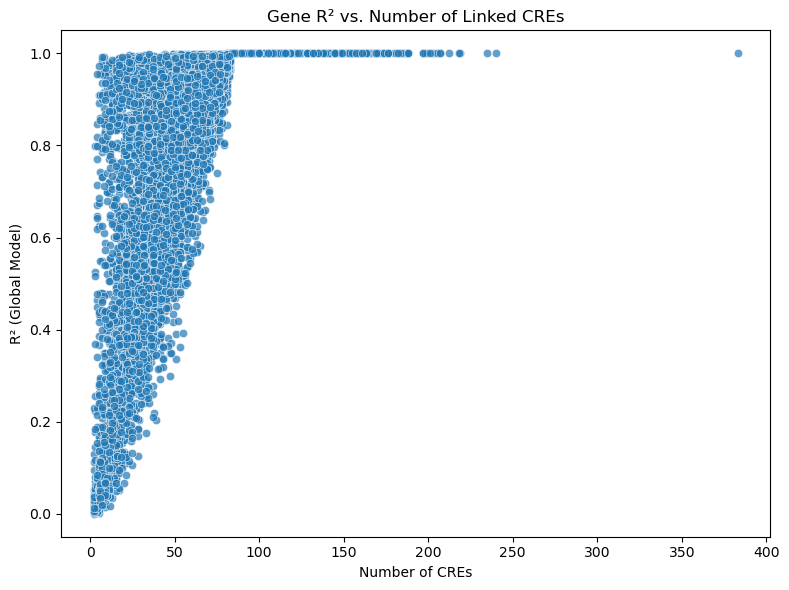

In [118]:
genes = regdf.groupby("gene").agg({
    "R2_global":"first",
    "id": "nunique"
}).rename(columns={"id":"n_CRes"}).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(x="n_CRes", y="R2_global", data=genes, alpha=0.7)
plt.title("Gene R² vs. Number of Linked CREs")
plt.xlabel("Number of CREs")
plt.ylabel("R² (Global Model)")
plt.tight_layout()
#plt.savefig("reports/r2_vs_nCREs.png")
plt.show()

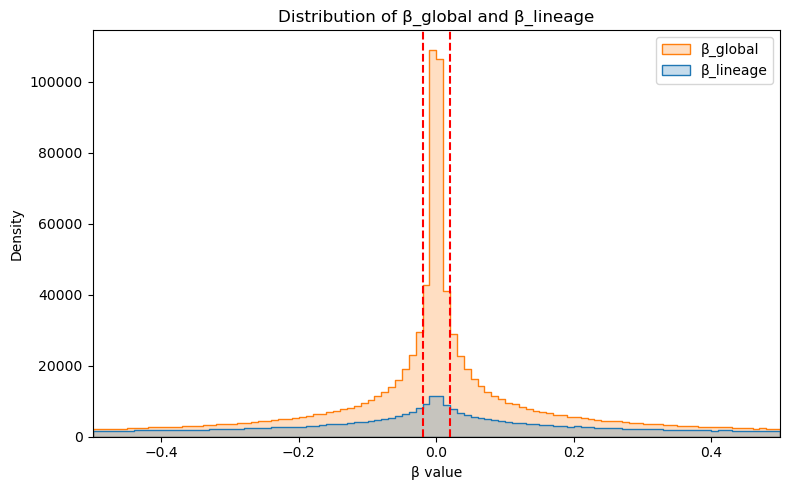

c:\Users\luisw\miniconda3\envs\data_analysis\Lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Figure size 600x600 with 0 Axes>

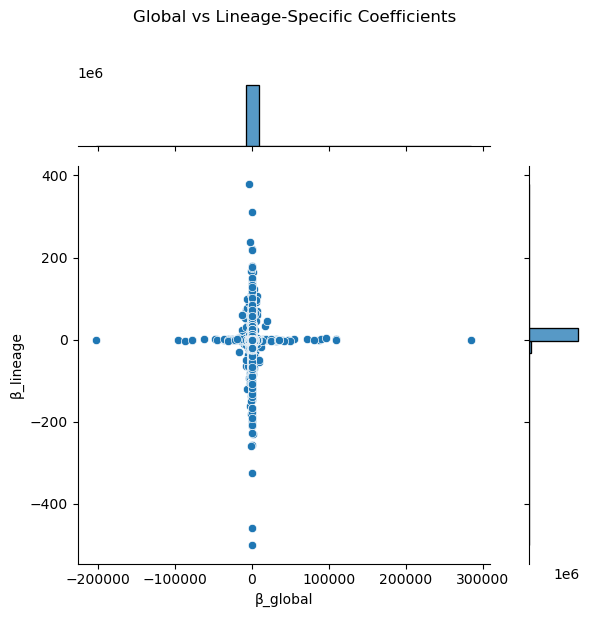

In [102]:
plt.figure(figsize=(8, 5))
sns.histplot(regdf[["beta_global", "beta_lineage"]], element="step", stat="count",
             binrange=(-0.5, 0.5), binwidth=0.01)
plt.xlim(-0.5, 0.5)
plt.axvline(0.02, color="red", linestyle="--")
plt.axvline(-0.02, color="red", linestyle="--")
plt.title("Distribution of β_global and β_lineage")
plt.xlabel("β value")
plt.ylabel("Density")
plt.legend(["β_global", "β_lineage"])
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.jointplot(x="beta_global", y="beta_lineage", data=regdf, #kind="hex", 
              cmap="Blues", marginal_kws=dict(bins=30))
plt.suptitle("Global vs Lineage-Specific Coefficients", y=1.02)
plt.xlabel("β_global")
plt.ylabel("β_lineage")
plt.tight_layout()
plt.show()

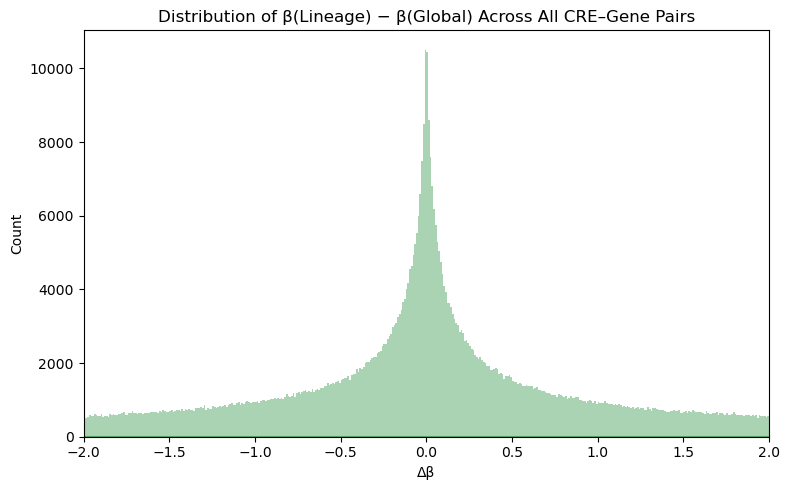

β difference summary:
 count    1.234991e+06
mean    -2.902921e-01
std      4.660879e+02
min     -2.845011e+05
25%     -2.460947e+00
50%     -4.591913e-03
75%      2.248175e+00
max      2.014682e+05
Name: beta_diff, dtype: float64


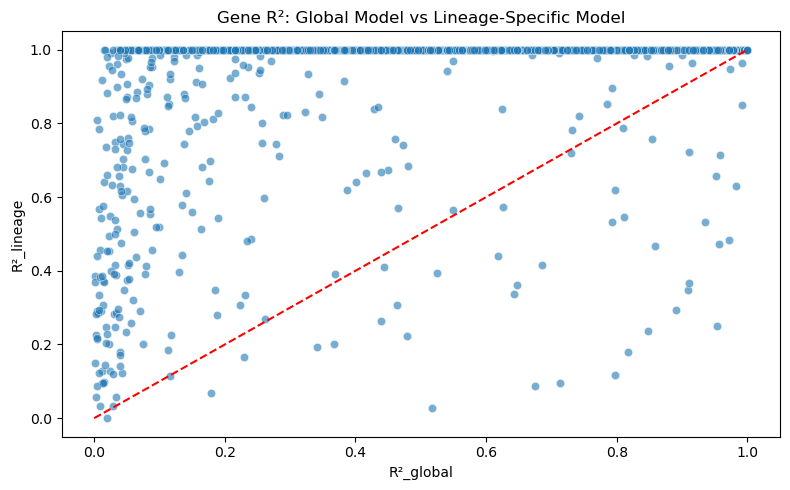

In [103]:
# b) Coefficient differences (lineage vs global)
plt.figure(figsize=(8, 5))
sns.histplot(regdf["beta_diff"], kde=True, color="#55a868",
             binrange=(-2, 2), binwidth=0.01)
plt.xlim(-2, 2)
plt.title("Distribution of β(Lineage) − β(Global) Across All CRE–Gene Pairs")
plt.xlabel("Δβ")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("β difference summary:\n", regdf["beta_diff"].describe())

# R² Global vs Lineage Comparison
plt.figure(figsize=(8, 5))
r2_cmp = regdf.groupby("gene")[["R2_global","R2_lineage"]].first().reset_index()
sns.scatterplot(x="R2_global", y="R2_lineage", data=r2_cmp, alpha=0.6)
plt.title("Gene R²: Global Model vs Lineage-Specific Model")
plt.xlabel("R²_global")
plt.ylabel("R²_lineage")
plt.plot([0,1],[0,1],'r--')
plt.tight_layout()
plt.show()

Top lineage-specific genes: ['Gabrq', 'Psg20', 'Sprr3', '4930434J06Rik', 'C730002L08Rik', 'A730046J19Rik', 'Ryr3', 'Adarb2', 'Stk32a', 'Tmprss11f', 'Znf41-ps', 'Usp13', 'Gm15056', 'Apcs', 'Trhde', 'Myt1l', 'Cst10', 'Olfr1389', 'Gria1', 'Psg21']
Key CREs for those genes:
                 gene                          id  delta_R2
26749  4930434J06Rik  ImmGenATAC1219.peak_157630  0.967024
26750  4930434J06Rik  ImmGenATAC1219.peak_157631  0.967024
26751  4930434J06Rik  ImmGenATAC1219.peak_157632  0.967024
26752  4930434J06Rik  ImmGenATAC1219.peak_157633  0.967024
26753  4930434J06Rik  ImmGenATAC1219.peak_157634  0.967024
26754  4930434J06Rik  ImmGenATAC1219.peak_157635  0.967024
26755  4930434J06Rik  ImmGenATAC1219.peak_157636  0.967024
26756  4930434J06Rik  ImmGenATAC1219.peak_157637  0.967024
49294  A730046J19Rik  ImmGenATAC1219.peak_510107  0.964671
49295  A730046J19Rik  ImmGenATAC1219.peak_510108  0.964671
49296  A730046J19Rik  ImmGenATAC1219.peak_510109  0.964671
49297  A730046J19Rik

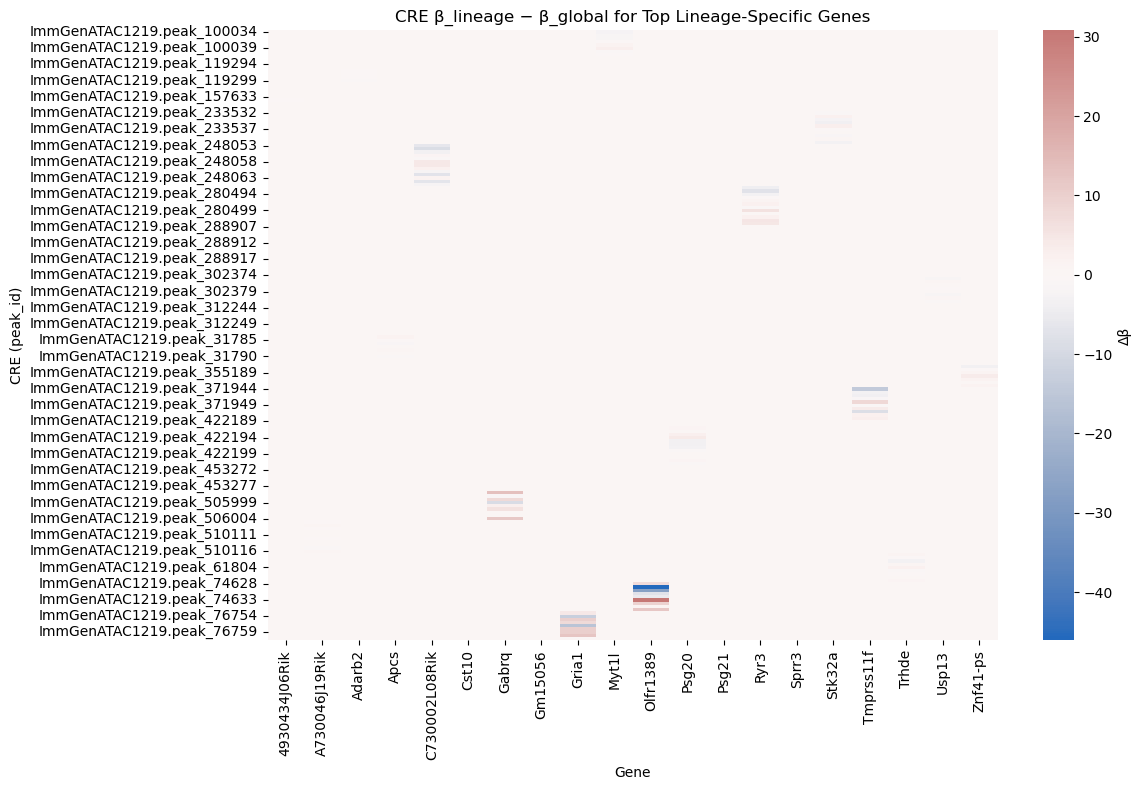

In [114]:
# c) Which CREs control lineage-specific genes?
#    Define by top delta R2 = R2_lineage - R2_global
regdf["delta_R2"] = np.abs(regdf["R2_lineage"] - regdf["R2_global"])
top_genes = regdf.groupby("gene")["delta_R2"].mean().nlargest(20).index
print("Top lineage-specific genes:", list(top_genes))
print("Key CREs for those genes:\n",
      regdf[regdf["gene"].isin(top_genes)][["gene","id","delta_R2"]].head(20))

# Pivot Δβ for those genes × CREs
sub = regdf[regdf["gene"].isin(top_genes)].copy()
pivot = sub.pivot(index="id", columns="gene", values="beta_diff").fillna(0)

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="vlag", center=0, cbar_kws={"label":"Δβ"})
plt.title("CRE β_lineage − β_global for Top Lineage‐Specific Genes")
plt.xlabel("Gene")
plt.ylabel("CRE (peak_id)")
plt.tight_layout()
#plt.savefig("reports/heatmap_top_genes_beta_diff.png")
plt.show()


Correlation between β_global and |r|: 0.01


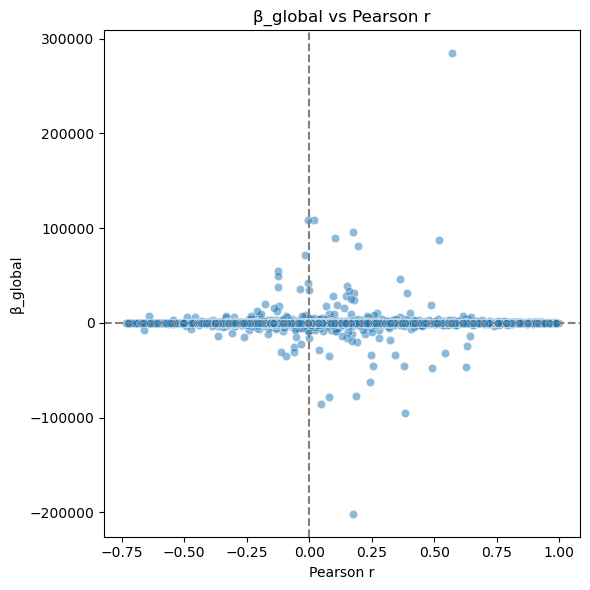

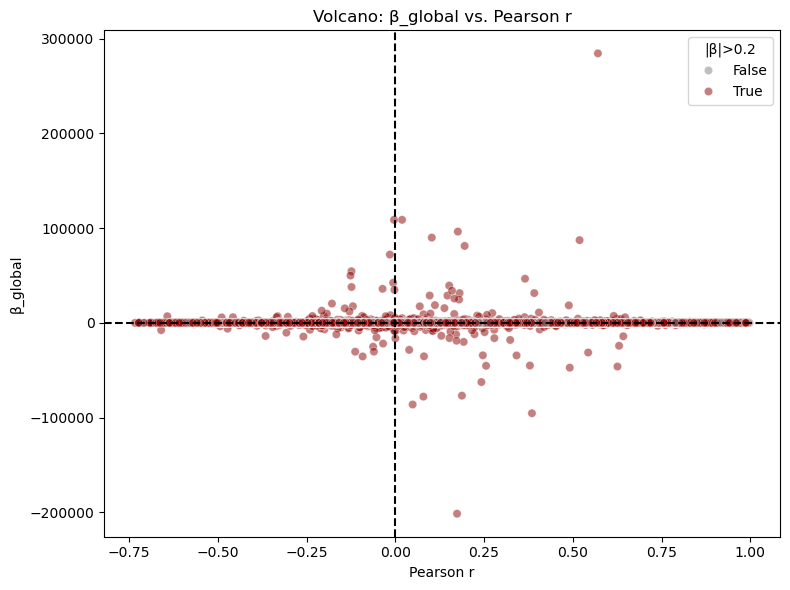

In [116]:
# d) Regression vs correlation
corr_vs_beta = regdf[["beta_global","pearson_r"]].corr().iloc[0,1]
print(f"Correlation between β_global and |r|: {corr_vs_beta:.2f}")

plt.figure(figsize=(6, 6))
sns.scatterplot(x="pearson_r", y="beta_global", data=regdf, alpha=0.5)
plt.title("β_global vs Pearson r")
plt.xlabel("Pearson r")
plt.ylabel("β_global")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# Volcano plot: β_global vs Pearson r
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="pearson_r", y="beta_global", data=regdf,
    hue=regdf["beta_global"].abs() > 0.2,
    palette={False:"gray", True:"darkred"},
    alpha=0.5
)
plt.axhline(0, color="black", linestyle="--")
plt.axvline(0, color="black", linestyle="--")
plt.title("Volcano: β_global vs. Pearson r")
plt.xlabel("Pearson r")
plt.ylabel("β_global")
plt.legend(title="|β|>0.2")
plt.tight_layout()
#plt.savefig("reports/volcano_beta_vs_corr.png")
plt.show()

Effect counts:
 effect
activating    558123
repressing    542615
neutral       134253
Name: count, dtype: int64


C:\Users\luisw\AppData\Local\Temp\ipykernel_24616\1285976863.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="effect", data=regdf, palette={"activating":"#8c564b","repressing":"#e377c2", "neutral":"#7f7f7f"})


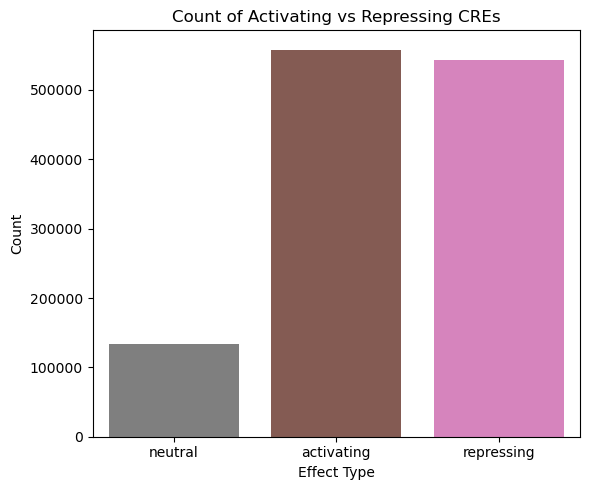

In [106]:
# e) Activating vs repressing counts
print("Effect counts:\n", regdf["effect"].value_counts())

plt.figure(figsize=(6, 5))
sns.countplot(x="effect", data=regdf, palette={"activating":"#8c564b","repressing":"#e377c2", "neutral":"#7f7f7f"})
plt.title("Count of Activating vs Repressing CREs")
plt.xlabel("Effect Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [107]:
# f) Genes mainly regulated by repressors
dominant = regdf.groupby("gene")["effect"] \
             .agg(lambda s: s.value_counts().idxmax())
frac_repress = (dominant == "repressing").mean()
print(f"Fraction of genes primarily repressed: {frac_repress:.2f}")

Fraction of genes primarily repressed: 0.38


Promoter enrichment:
 is_promoter     False     True 
effect                         
activating   0.940606  0.059394
neutral      0.904017  0.095983
repressing   0.942386  0.057614
Intragenic enrichment:
 is_intragenic     False     True 
effect                           
activating     0.542977  0.457023
neutral        0.590311  0.409689
repressing     0.542718  0.457282


<Figure size 600x500 with 0 Axes>

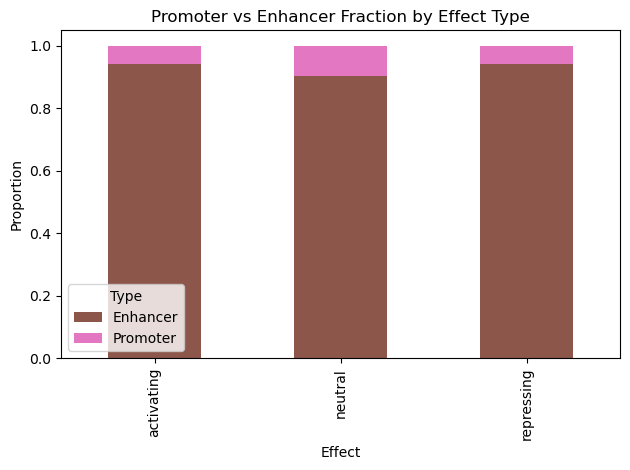

<Figure size 600x500 with 0 Axes>

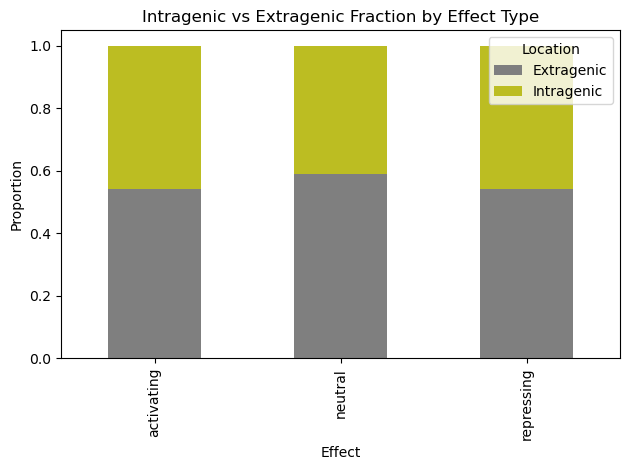

In [108]:
# g) Location of repressors vs activators
print("Promoter enrichment:\n",
      pd.crosstab(regdf["effect"], regdf["is_promoter"], normalize="index"))
print("Intragenic enrichment:\n",
      pd.crosstab(regdf["effect"], regdf["is_intragenic"], normalize="index"))

# Plot promoter vs enhancer fraction by effect type
prom_effect = pd.crosstab(regdf["effect"], regdf["is_promoter"], normalize="index")
plt.figure(figsize=(6, 5))
prom_effect.plot(kind="bar", stacked=True, color=["#8c564b","#e377c2"])
plt.title("Promoter vs Enhancer Fraction by Effect Type")
plt.xlabel("Effect")
plt.ylabel("Proportion")
plt.legend(["Enhancer","Promoter"], title="Type")
plt.tight_layout()
plt.show()

# Plot intragenic vs extragenic fraction by effect type
intra_effect = pd.crosstab(regdf["effect"], regdf["is_intragenic"], normalize="index")
plt.figure(figsize=(6, 5))
intra_effect.plot(kind="bar", stacked=True, color=["#7f7f7f","#bcbd22"])
plt.title("Intragenic vs Extragenic Fraction by Effect Type")
plt.xlabel("Effect")
plt.ylabel("Proportion")
plt.legend(["Extragenic","Intragenic"], title="Location")
plt.tight_layout()
plt.show()

<Figure size 600x500 with 0 Axes>

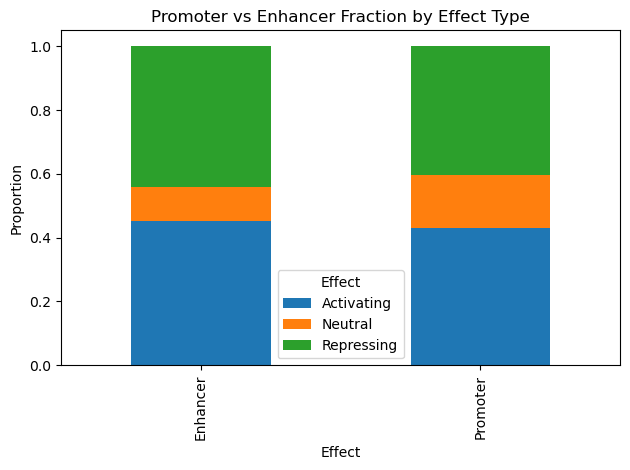

<Figure size 600x500 with 0 Axes>

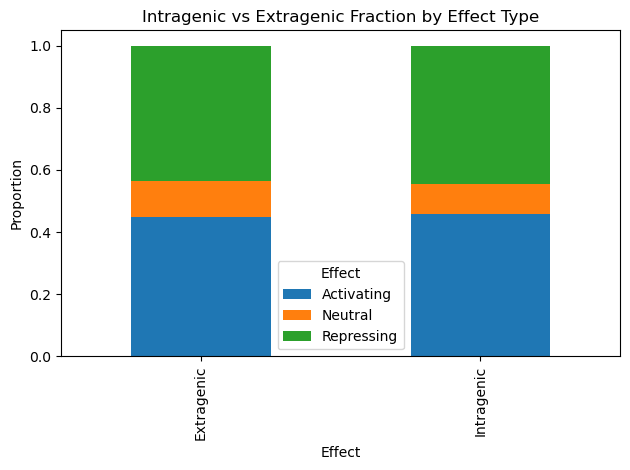

In [109]:
# Plot promoter vs enhancer fraction by effect type
prom_effect = pd.crosstab(regdf["is_promoter"], regdf["effect"], normalize="index")
plt.figure(figsize=(6, 5))
prom_effect.plot(kind="bar", stacked=True)
plt.title("Promoter vs Enhancer Fraction by Effect Type")
plt.xlabel("Effect")
plt.ylabel("Proportion")
plt.xticks([0, 1], ["Enhancer", "Promoter"])
plt.legend(["Activating", "Neutral", "Repressing"], title="Effect")
plt.tight_layout()
plt.show()

# Plot intragenic vs extragenic fraction by effect type
intra_effect = pd.crosstab(regdf["is_intragenic"], regdf["effect"], normalize="index")
plt.figure(figsize=(6, 5))
intra_effect.plot(kind="bar", stacked=True)
plt.title("Intragenic vs Extragenic Fraction by Effect Type")
plt.xlabel("Effect")
plt.ylabel("Proportion")
plt.xticks([0, 1], ["Extragenic", "Intragenic"])
plt.legend(["Activating", "Neutral", "Repressing"], title="Effect")
plt.tight_layout()
plt.show()

CREs with both activating & repressing roles: 212568


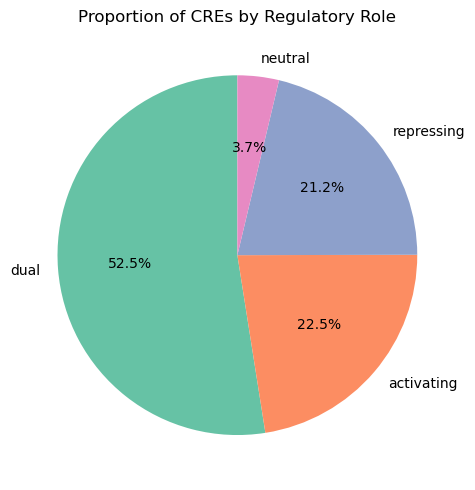

In [110]:
# h) CREs with dual roles
dual = regdf.groupby("id")["effect"].nunique().gt(1).sum()
print(f"CREs with both activating & repressing roles: {dual}")

# Count CREs by effect type: dual, activating-only, repressing-only, neutral-only, etc.
effect_counts = regdf.groupby("id")["effect"].agg(lambda x: set(x)).value_counts()
single_counts = regdf.groupby("id")["effect"].agg(lambda x: list(set(x))[0] if len(set(x)) == 1 else "dual").value_counts()

# Prepare data for plotting
labels = single_counts.index
sizes = single_counts.values / single_counts.values.sum()

plt.figure(figsize=(6, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(labels)))
plt.title("Proportion of CREs by Regulatory Role")
plt.tight_layout()
plt.show()

In [111]:
# i) Re-cluster with directionality
pe_list = regdf.sample(frac=0.001, random_state=42)["id"].unique()
profiles = []
for pid in pe_list:
    sign = np.sign(regdf.loc[regdf["id"]==pid,"beta_global"].mean())
    profiles.append(atac.loc[pid].values.ravel() * sign)
Z = StandardScaler().fit_transform(np.array(profiles))
labels = KMeans(n_clusters=20, random_state=0).fit_predict(Z)
pd.DataFrame({"id":pe_list,"signed_module":labels}) \
  .to_csv("data-processed/cre_signed_modules.csv", index=False)
print("Re-clustering with sign done.")

Re-clustering with sign done.


404971


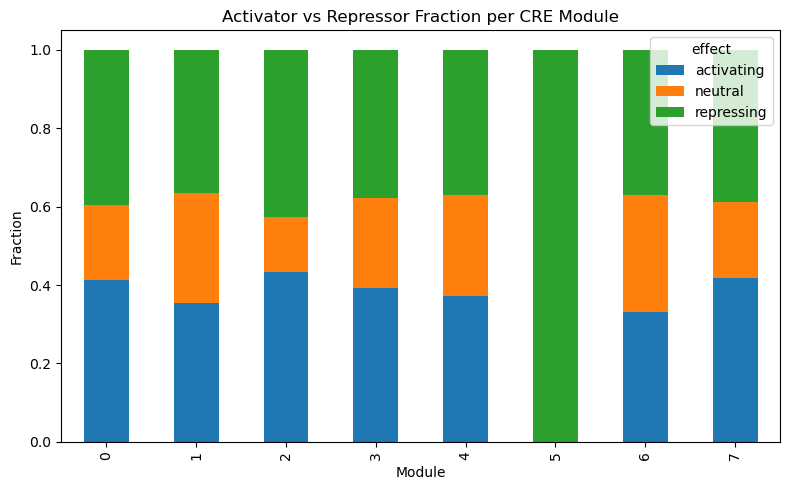

In [122]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Build CRE×CellType matrix
cre_ids = regdf["id"].unique()
profiles = atac.loc[cre_ids]

# Standardize and cluster
Z = StandardScaler().fit_transform(profiles)
labels = KMeans(n_clusters=8, random_state=0).fit_predict(Z)

# Annotate each CRE with module & effect
cre_info = pd.DataFrame({
    "id": cre_ids,
    "module": labels
}).merge(regdf[["id","effect"]].drop_duplicates(), on="id")

# Fraction by module
frac = pd.crosstab(cre_info["module"], cre_info["effect"], normalize="index")

frac.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Activator vs Repressor Fraction per CRE Module")
plt.xlabel("Module")
plt.ylabel("Fraction")
plt.tight_layout()
#plt.savefig("reports/module_effect_fraction.png")
plt.show()

C:\Users\luisw\AppData\Local\Temp\ipykernel_24616\3393716859.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


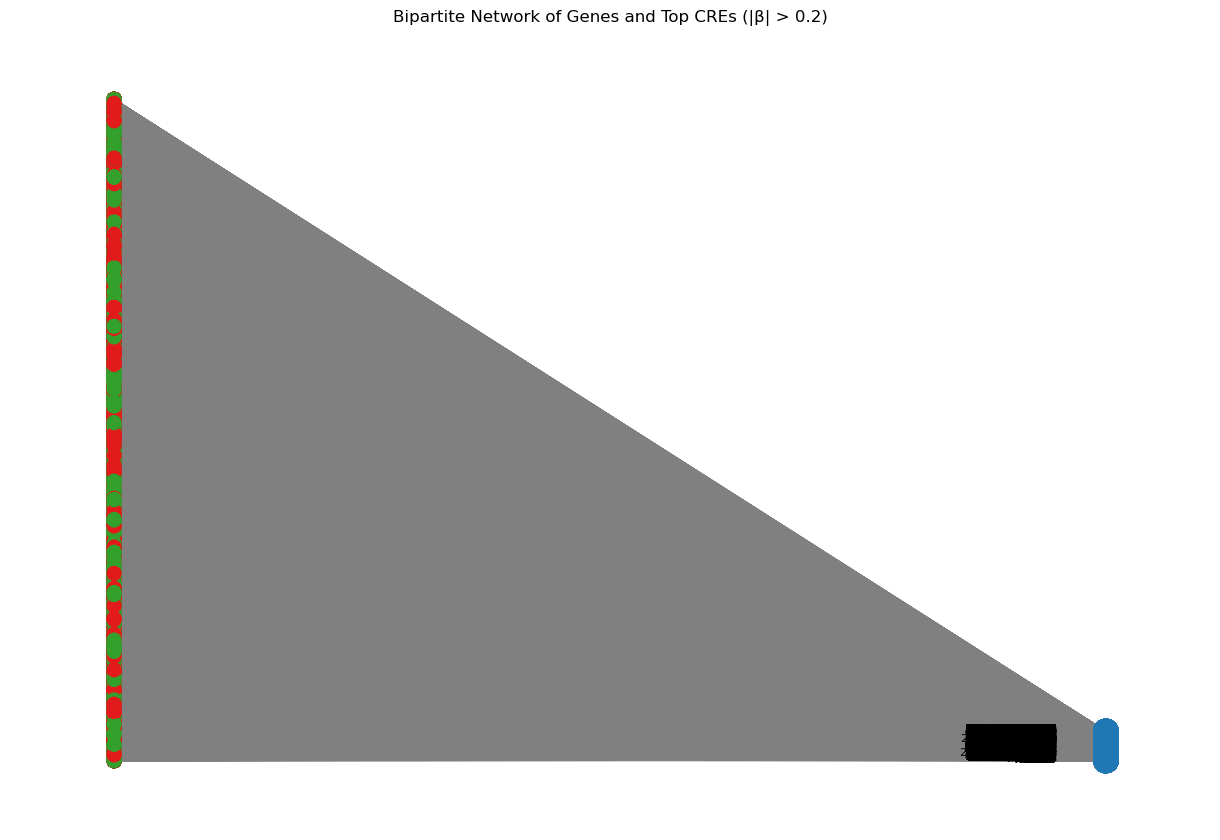

In [124]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 2) Select “top” CRE–gene edges
#    Here: only keep edges where |beta_global| > 0.2
threshold = 0.2
top_edges = regdf[regdf["beta_global"].abs() > threshold].copy()

# 3) Build a bipartite graph
G = nx.Graph()
genes   = set(top_edges["gene"])
cres    = set(top_edges["id"])

# Add gene nodes (set bipartite=0)
for g in genes:
    G.add_node(g, bipartite=0, label=g, color="#1f78b4", size=300)

# Add CRE nodes (bipartite=1), colored by effect
for pid, eff in top_edges[["id","effect"]].drop_duplicates().values:
    color = "#33a02c" if eff=="activating" else "#e31a1c"
    G.add_node(pid, bipartite=1, label=str(pid), color=color, size=100)

# Add edges
for _, row in top_edges.iterrows():
    G.add_edge(row["gene"], row["id"], weight=row["beta_global"])

# 4) Position nodes with bipartite layout
pos = dict()
# Use nx.bipartite.color to assign sets even if the graph is disconnected
coloring = nx.bipartite.color(G)
left = {n for n, b in coloring.items() if b == 0}
right = {n for n, b in coloring.items() if b == 1}
# Genes on the left
pos.update((n, (0, i)) for i, n in enumerate(left))
# CREs on the right
pos.update((n, (1, i)) for i, n in enumerate(right))

# 5) Draw
plt.figure(figsize=(12, 8))
node_colors = [data["color"] for _, data in G.nodes(data=True)]
node_sizes  = [data["size"] for _, data in G.nodes(data=True)]

nx.draw(
    G, pos,
    with_labels=False,
    node_color=node_colors,
    node_size=node_sizes,
    edge_color="gray",
    width=1
)

# Draw labels separately (smaller font)
for n, (x, y) in pos.items():
    if n in genes:  # only label genes
        plt.text(x-0.05, y, n, horizontalalignment="right", fontsize=8)

plt.title(f"Bipartite Network of Genes and Top CREs (|β| > {threshold})")
plt.axis("off")
plt.tight_layout()
#plt.savefig("reports/bipartite_gene_CRE_network.png", dpi=300)
plt.show()